In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
trip1 = pd.read_csv('/home/kyohei/bike_share_data/201402_babs_open_data/201402_trip_data.csv')
trip2 = pd.read_csv('/home/kyohei/bike_share_data/201408_babs_open_data/201408_trip_data.csv')
trip = pd.read_csv('/home/kyohei/bike_share_data/201608_trip_data.csv')

In [27]:
trip1.rename(columns={'Subscription Type':'Subscriber Type'},inplace=True)

In [29]:
trip = pd.concat([trip1,trip2],axis=0)

In [30]:
trip.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [31]:
station = pd.read_csv('/home/kyohei/bike_share_data/201608_station_data.csv')

In [32]:
#サンフランシスコ発のデータに限定
station_sub = station[['station_id','landmark']]

station_sub_sf = station_sub[station_sub['landmark']=='San Francisco']

trip_merge_landmark = trip.merge(station_sub_sf,left_on='Start Terminal',right_on='station_id',how='inner')

In [33]:
#日付データの変換
trip_merge_landmark['Start Date'] = trip_merge_landmark['Start Date'].apply(lambda x:pd.to_datetime(x))

#曜日データの付与
trip_merge_landmark['dayofweek'] = trip_merge_landmark['Start Date'].apply(lambda x:x.dayofweek)

#日付データの付与
trip_merge_landmark['start_date'] = trip_merge_landmark['Start Date'].apply(lambda x:x.date())

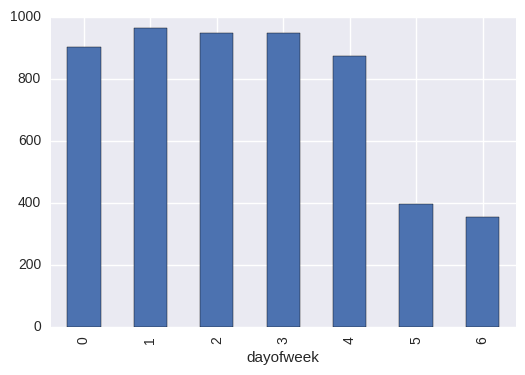

In [34]:
#曜日別の一日平均利用回数（スタートベース、San Francisco地区）
trip_merge_landmark_groupby_date = pd.DataFrame(trip_merge_landmark.groupby(['start_date','dayofweek']).size()).reset_index()

trip_merge_landmark_groupby_date.groupby('dayofweek')[0].mean().plot(kind='bar')

In [35]:
#時間データの付加
trip_merge_landmark['hour'] = trip_merge_landmark['Start Date'].apply(lambda x:x.time().hour)

In [36]:
#曜日別の平均貸出数推移の作成
#日付別、曜日別、時間別貸出数の算出
trip_merge_landmark_group_date_hour = pd.DataFrame(trip_merge_landmark.groupby(['start_date','dayofweek','hour']).size()).reset_index()

#曜日別、時間別、平均貸出数の算出
plot_data = pd.DataFrame(trip_merge_landmark_group_date_hour.groupby(['dayofweek','hour'])[0].mean()).reset_index()

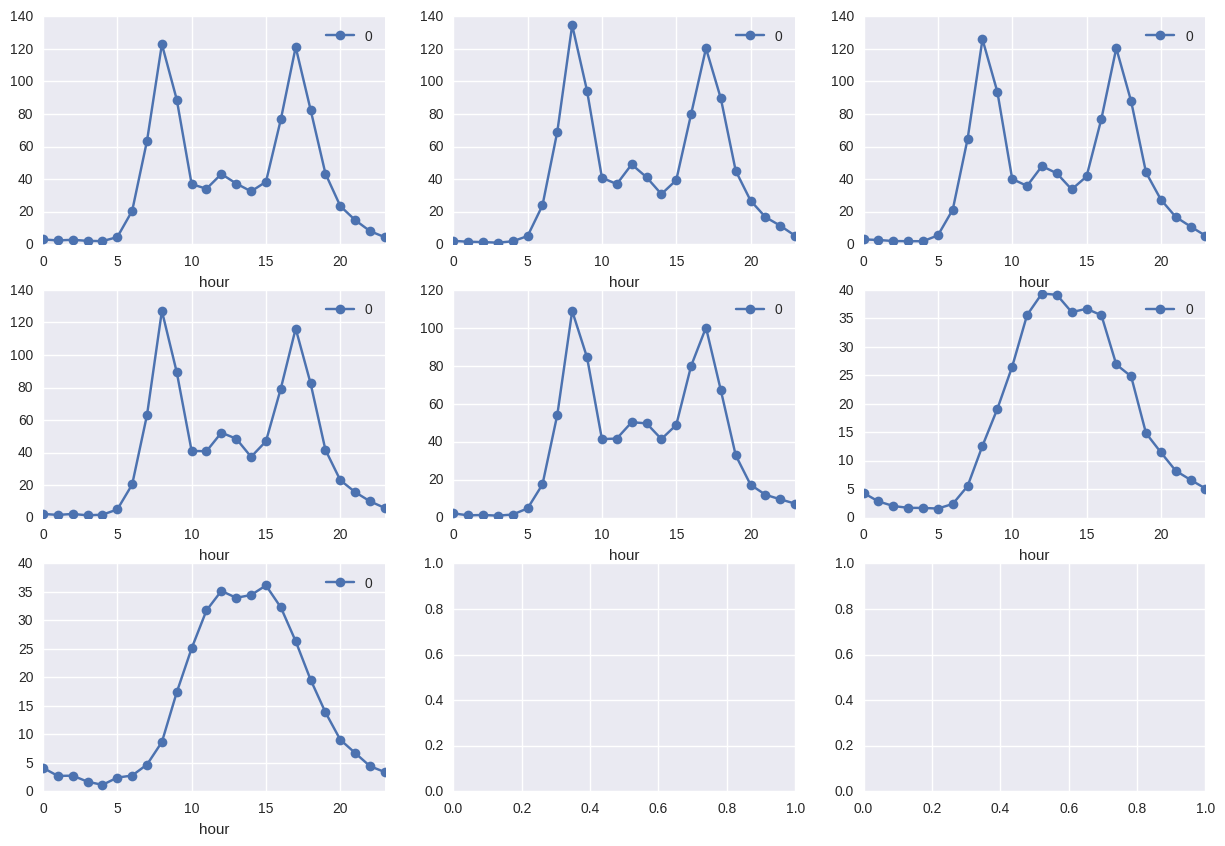

In [37]:
fig, axes = plt.subplots(3,3,figsize=(15,10))
dayofweeks = [0,1,2,3,4,5,6]
targets = zip(dayofweeks,axes.flatten())

for (dayofweek,ax) in targets:
    plot_data[plot_data['dayofweek']==dayofweek].plot('hour',0,ax=ax,style='-o')

In [38]:
#平日データに限定
trip_merge_landmark_weekday = trip_merge_landmark[trip_merge_landmark.dayofweek<=4]

In [39]:
#利用数top
start_station_ranking = trip_merge_landmark_weekday.groupby(['Start Terminal','Start Station']).size().sort_values(ascending=False)
start_station_ranking

Start Terminal  Start Station                                
70              San Francisco Caltrain (Townsend at 4th)         21208
50              Harry Bridges Plaza (Ferry Building)             12066
77              Market at Sansome                                11410
55              Temporary Transbay Terminal (Howard at Beale)    11190
69              San Francisco Caltrain 2 (330 Townsend)          11123
61              2nd at Townsend                                  10185
60              Embarcadero at Sansome                            9984
74              Steuart at Market                                 9912
65              Townsend at 7th                                   8853
76              Market at 4th                                     8318
64              2nd at South Park                                 8139
67              Market at 10th                                    7362
39              Powell Street BART                                7202
62             

In [40]:
start_station_ranking.mean()

6564.918918918919

In [41]:
#返却数top
end_station_ranking = trip_merge_landmark_weekday.groupby(['End Terminal','End Station']).size().sort_values(ascending=False)
end_station_ranking

End Terminal  End Station                                  
70            San Francisco Caltrain (Townsend at 4th)         26494
77            Market at Sansome                                12929
50            Harry Bridges Plaza (Ferry Building)             11882
69            San Francisco Caltrain 2 (330 Townsend)          11787
60            Embarcadero at Sansome                           11428
61            2nd at Townsend                                  11355
65            Townsend at 7th                                  10036
74            Steuart at Market                                 9936
55            Temporary Transbay Terminal (Howard at Beale)     9684
76            Market at 4th                                     8023
39            Powell Street BART                                7896
64            2nd at South Park                                 7694
67            Market at 10th                                    6712
63            Howard at 2nd                

In [42]:
end_station_ranking.mean()

5520.5